<a href="https://colab.research.google.com/github/Navaneetdatta/CE888-repositor/blob/main/lab_3/bank%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#load data
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# dropping rows with any missing values
df = df.dropna()   

In [ ]:
# feature columns
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

x_df = df[features]

# target/outcome column
outcome = ['y']
y_df = df[outcome]

In [ ]:
# converting lables into numbers
y_df = y_df.apply(LabelEncoder().fit_transform)

In [ ]:
x_df.shape

(41188, 20)

In [ ]:
x_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
# one-hot encoding on categorical features

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week','poutcome']
numerical_features = ['age', 'campaign', 'duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed']

# x_df1 = pd.get_dummies(x_df1[categorical_features])
# x_df = pd.concat([x_df[numerical_features], x_df1])

x_df = pd.get_dummies(x_df)

In [ ]:
x_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [ ]:
# drop "duration" column
x_df = x_df.drop(columns = ['duration'])

In [ ]:
x_df.shape

(41188, 62)

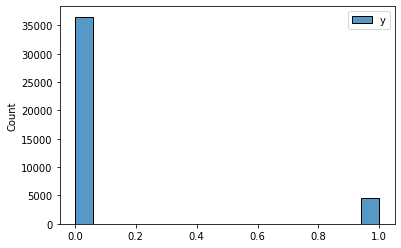

In [ ]:
#histogram of label
sns.histplot(y_df)

In [ ]:
#calculating imbalance in the data
total_y = len(y_df)

class_0 = (y_df == 0).sum()
class_1 = (y_df == 1).sum()

#imbalance in classes
percentage_class_0 = (class_0/total_y)*100
print("Percentage of observations belonging to class 0 = " , percentage_class_0)

Percentage of observations belonging to class 0 =  y    88.734583
dtype: float64


In [ ]:
# modelling data

x = x_df
y = y_df

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.20, random_state = 50)

In [ ]:
# creating a dummy classifier
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_scores = cross_val_score(dummy_clf, x_train, y_train, cv = 10, scoring = make_scorer(f1_score))

In [ ]:
# train random forest classifier on training data using 10 fold cross validation
rfc_clf = RandomForestClassifier(n_estimators = 100, max_depth = 3)

#Quiz question 9
#rfc_clf = RandomForestClassifier(n_estimators = 300, max_depth = 12, random_state= 60)

rfc_clf_scores = cross_val_score(rfc_clf, x_train, y_train, cv = 10, scoring = make_scorer(f1_score))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
# comparing the results of random forest and dummy classifier
print("Dummy accuracy : %0.3f +/- %0.3f" % (dummy_scores.mean(), dummy_scores.std()))
print("Model accuracy : %0.3f +/- %0.3f" % (rfc_clf_scores.mean(), rfc_clf_scores.std()))

Dummy accuracy : 0.118 +/- 0.014
Model accuracy : 0.247 +/- 0.038


In [ ]:
# gridsearchcv to find better set of parameters
param_grid = {"n_estimators" : [100, 200], "max_features": ['auto', 'sqrt', 'log2'], "max_depth": [3, 5, 8]}
cv_rfc = GridSearchCV(estimator = rfc_clf, param_grid = param_grid, cv = 10)

In [ ]:
cv_rfc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [ ]:
print(cv_rfc.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
best_acc = cv_rfc.best_score_
best_param = cv_rfc.best_params_
print("Best Accuracy: {:.2f} %".format(best_acc*100))
print("Best Parameters:", best_param)

Best Accuracy: 89.99 %
Best Parameters: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
importances = cv_rfc.best_estimator_.feature_importances_

#newlist = [x for x in fruits if "a" in x]
indices = np.argsort(importances)[-3:]
values = [importances[i] for i in indices]


#X_train[indices[0]]
print(values)

[0.09758598695475028, 0.15496424248796165, 0.17632591148647633]


In [ ]:
# Print the feature ranking
for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]],  importances[indices[f]]))
#df.columns[pos]

1. marital (0.097586)
2. contact (0.154964)
3. month (0.176326)


In [ ]:
#Quiz Question 8:
test_clf =RandomForestClassifier(n_estimators=100, max_depth=8, random_state=60)
test_clf.fit(x_train,y_train)
f1_scr = round(f1_score(y_test,test_clf.predict(x_test)),3)
f1_scr = f1_scr*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("%f" % f1_scr)

33.600000


In [ ]:
#generalization error

y_pred = cv_rfc.predict(x_test)
f1_scr = f1_score(y_pred, y_test)
print("Generalization error: {:.2f}".format(f1_scr))

Generalization error: 0.33


Quiz

Attempt #2

In [ ]:
#Question 4:

# creating a dummy classifier
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_scores = cross_val_score(dummy_clf, x_train, y_train, cv = 10, scoring = make_scorer(f1_score))
print("Dummy accuracy : %0.3f +/- %0.3f" % (dummy_scores.mean(), dummy_scores.std()))


Dummy accuracy : 0.115 +/- 0.015


In [ ]:
#Question 6:
rfc_clf = RandomForestClassifier(n_estimators = 250, max_depth = 6)
rfc_clf_scores = cross_val_score(rfc_clf, x_train, y_train, cv = 10, scoring = make_scorer(f1_score))

print("Model accuracy : %0.3f +/- %0.3f" % (rfc_clf_scores.mean(), rfc_clf_scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Model accuracy : 0.282 +/- 0.045


In [ ]:
#Question 7:
rfc_clf = RandomForestClassifier(n_estimators = 400, max_depth = 6)
rfc_clf_scores = cross_val_score(rfc_clf, x_train, y_train, cv = 10, scoring = make_scorer(f1_score))

print("Model accuracy : %0.3f +/- %0.3f" % (rfc_clf_scores.mean(), rfc_clf_scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Model accuracy : 0.282 +/- 0.047
